# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load dataset
link = 'https://raw.githubusercontent.com/kpunsalan8/linearModels-KP/refs/heads/main/lab/data/pierce_county_house_sales.csv'
df = pd.read_csv(link,low_memory=False)

In [3]:
# peek at data
df.head()

,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,hvac_description,exterior,interior,stories,roof_cover,year_built,bedrooms,bathrooms,waterfront_type,view_quality,utility_sewer
0,2020-01-02,380000,2157,0,0,528,0,0,Warm and Cool Air Zone,Frame Siding,Drywall,2,Composition Shingle,1993,3,3,NaN,NaN,SEWER/SEPTIC INSTALLED
1,2020-01-02,383000,2238,0,0,396,0,0,Forced Air,Frame Siding,Drywall,2,Composition Shingle,2017,4,3,NaN,NaN,SEWER/SEPTIC INSTALLED
2,2020-01-01,419900,1452,0,0,0,0,1,Forced Air,Frame Siding,Drywall,1,Built Up Rock,1965,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED
3,2020-01-02,251660,832,0,0,0,0,0,Forced Air,Frame Vinyl,Drywall,1,Composition Shingle,1919,2,1,NaN,NaN,SEWER/SEPTIC INSTALLED
4,2020-01-02,500000,1780,0,384,484,0,1,Forced Air,Frame Siding,Drywall,1,Composition Shingle,1955,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED


### Q1 Clean and explore data

In [5]:
# Q1 Explore data - columns and dimensions
df.shape
df.dtypes

,0
sale_date,object
sale_price,int64
house_square_feet,int64
attic_finished_square_feet,int64
basement_square_feet,int64
attached_garage_square_feet,int64
detached_garage_square_feet,int64
fireplaces,int64
hvac_description,object
exterior,object


In [4]:
# Clean the data

# drop columns not interested in using
# drop waterfront_type column
df.drop(columns=['waterfront_type'],inplace=True)
# drop utility_sewer column - all properties should have
df.drop(columns=['utility_sewer'],inplace=True)
# drop view_quality
df.drop(columns=['view_quality'],inplace=True)
# drop roof_cover
df.drop(columns=['roof_cover'],inplace=True)

In [7]:
# drop interior column
df.drop(columns=['interior'],inplace=True)
# drop exterior column
df.drop(columns=['exterior'],inplace=True)

In [8]:
# see value counts of hvac_description
df['hvac_description'].value_counts()

,count
hvac_description,
Forced Air,10382
Electric Baseboard,2668
Heat Pump,2084
Warm and Cool Air Zone,1268
Floor/Wall Furnace,174
Hot Water Baseboard,146
No Heat,82
Electric,2
Floor Wall Furnace,1


In [9]:
# drop hvac_description column
df.drop(columns=['hvac_description'],inplace=True)

In [10]:
# peek at data again
df.head()

,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,stories,year_built,bedrooms,bathrooms
0,2020-01-02,380000,2157,0,0,528,0,0,2,1993,3,3
1,2020-01-02,383000,2238,0,0,396,0,0,2,2017,4,3
2,2020-01-01,419900,1452,0,0,0,0,1,1,1965,3,2
3,2020-01-02,251660,832,0,0,0,0,0,1,1919,2,1
4,2020-01-02,500000,1780,0,384,484,0,1,1,1955,3,2


In [11]:
# create new variable garage_type
# Attached if attached garage feet > 0
# Detached if detached garage feet > 0
# None if attached and detached both = 0
df['garage_type'] = 'None'
df.loc[df['attached_garage_square_feet'] > 0, 'garage_type'] = 'Attached'
df.loc[df['detached_garage_square_feet'] > 0, 'garage_type'] = 'Detached'

In [12]:
df.dtypes

,0
sale_date,object
sale_price,int64
house_square_feet,int64
attic_finished_square_feet,int64
basement_square_feet,int64
attached_garage_square_feet,int64
detached_garage_square_feet,int64
fireplaces,int64
stories,int64
year_built,int64


In [13]:
import seaborn as sns # Import Seaborn

In [14]:
# do some exploration and visualizations to get to know data
df['sale_price'].describe()

,sale_price
count,1.681400e+04
mean,4.612332e+05
std,2.360833e+05
min,2.000000e+03
25%,3.480000e+05
50%,4.165000e+05
75%,5.238065e+05
max,6.130000e+06


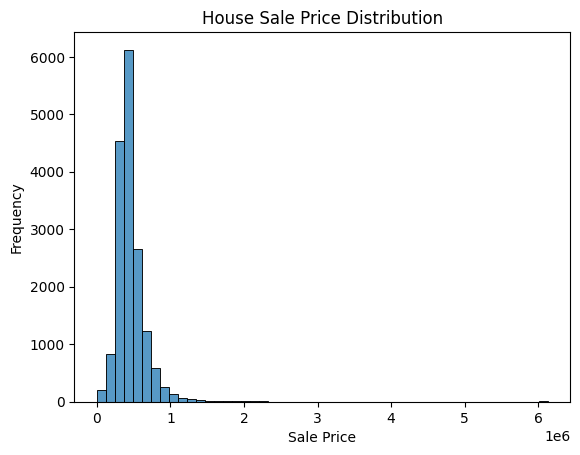

In [15]:
# look at sale price distribution
var = 'sale_price'
sns.histplot(df[var], bins=50)
plt.title('House Sale Price Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

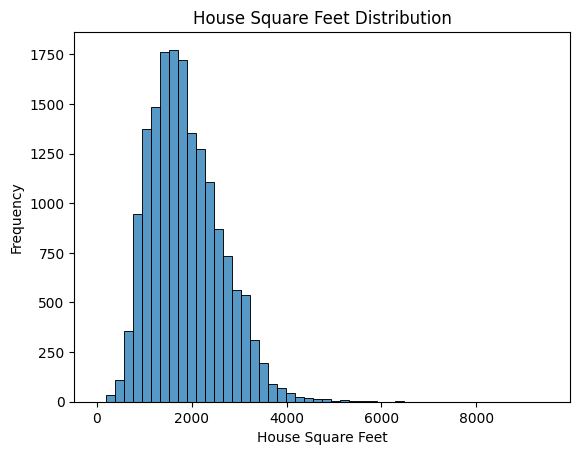

In [16]:
# look at house square feet
var = 'house_square_feet'
sns.histplot(df[var], bins=50)
plt.title('House Square Feet Distribution')
plt.xlabel('House Square Feet')
plt.ylabel('Frequency')
plt.show()

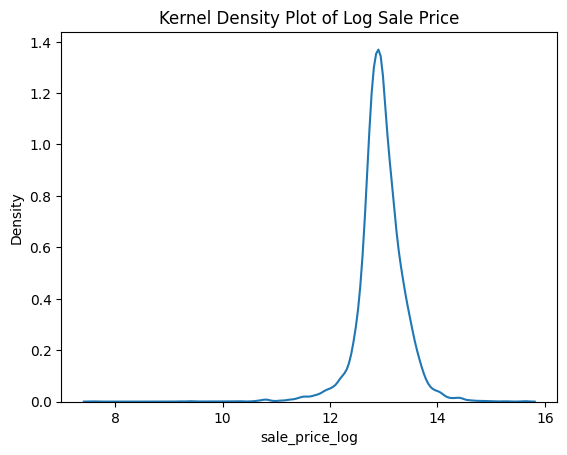

In [17]:
# kernel density plot of the log of sale price
df['sale_price_log'] = np.log(df['sale_price'])

var = 'sale_price_log'
sns.kdeplot(df[var])
plt.title('Kernel Density Plot of Log Sale Price')
plt.show()

[Text(0.5, 1.0, 'Log Sale Price Conditional on Garage Type')]

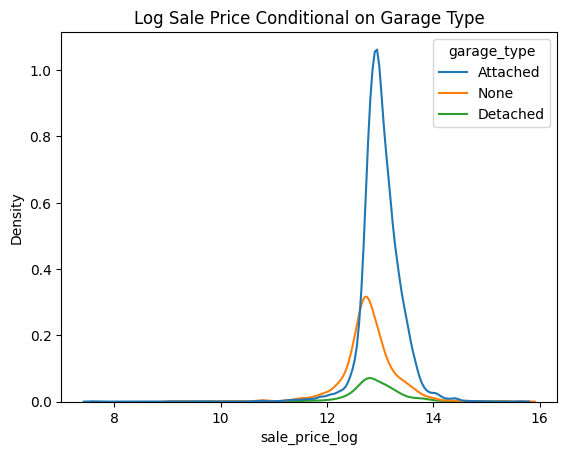

In [18]:
# kernel density plot of the log of price conditional on garage type
conditioning = 'garage_type'
var = 'sale_price_log'
fig = sns.kdeplot( data=df, x=var, hue=conditioning)
fig.set(title='Log Sale Price Conditional on Garage Type')

### Q2 Transform any categorical variables for use in regression

In [19]:
# Q2 transform any categorical variables for use in regression analysis
# garage_type
# dummy variables for the 'garage_type' column
garage_dummies = pd.get_dummies(df['garage_type'], prefix='garage', drop_first=True)
# concat with the original DataFrame
df = pd.concat([df, garage_dummies], axis=1)

df.head()

,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,stories,year_built,bedrooms,bathrooms,garage_type,sale_price_log,garage_Detached,garage_None
0,2020-01-02,380000,2157,0,0,528,0,0,2,1993,3,3,Attached,12.847927,False,False
1,2020-01-02,383000,2238,0,0,396,0,0,2,2017,4,3,Attached,12.855790,False,False
2,2020-01-01,419900,1452,0,0,0,0,1,1,1965,3,2,None,12.947772,False,True
3,2020-01-02,251660,832,0,0,0,0,0,1,1919,2,1,None,12.435834,False,True
4,2020-01-02,500000,1780,0,384,484,0,1,1,1955,3,2,Attached,13.122363,False,False


In [20]:
# drop original garage_type column
df.drop(columns=['garage_type'],inplace=True)

### Q3 Implement an 80/20 train-test split

In [21]:
# Q3
# Implement an 80/20 train-test split
from sklearn.model_selection import train_test_split

In [30]:
# target variable
y = df['sale_price']
# drop non-features
X = df.drop(columns=['sale_price', 'sale_date', 'sale_price_log'])

# split the sample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have:
# X_train, y_train: Training data (80% of the data)
# X_test, y_test: Testing data (20% of the data)
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 13451
Testing set size: 3363


### Q4 Some simple linear models

In [31]:
# Q4
# some simple linear models that include no transformations or interactions
# Fit them, and determine their RMSE and  𝑅2  on the both the training and test sets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
# simple linear model 1 - using all features
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_train_pred1 = model1.predict(X_train)
y_test_pred1 = model1.predict(X_test)

In [33]:
rmse_train1 = np.sqrt(mean_squared_error(y_train, y_train_pred1))
rmse_test1 = np.sqrt(mean_squared_error(y_test, y_test_pred1))
print(f"Model 1 - RMSE Train: {rmse_train1}, RMSE Test: {rmse_test1}")
r2_train1 = r2_score(y_train, y_train_pred1)
r2_test1 = r2_score(y_test, y_test_pred1)
print(f"Model 1 - R2 Train: {r2_train1}, R2 Test: {r2_test1}")

Model 1 - RMSE Train: 175795.4036774005, RMSE Test: 202255.18762612785
Model 1 - R2 Train: 0.4186797856243589, R2 Test: 0.38023428664866


In [34]:
# simple linear model 2 - using a subset of features
model2 = LinearRegression()
sub_features = ['bedrooms', 'bathrooms', 'house_square_feet', 'year_built', 'basement_square_feet']
model2.fit(X_train[sub_features], y_train)
y_train_pred2 = model2.predict(X_train[sub_features])
y_test_pred2 = model2.predict(X_test[sub_features])

In [35]:
rmse_train2 = np.sqrt(mean_squared_error(y_train, y_train_pred2))
rmse_test2 = np.sqrt(mean_squared_error(y_test, y_test_pred2))
print(f"Model 2 - RMSE Train: {rmse_train2}, RMSE Test: {rmse_test2}")
r2_train2 = r2_score(y_train, y_train_pred2)
r2_test2 = r2_score(y_test, y_test_pred2)
print(f"Model 2 - R2 Train: {r2_train2}, R2 Test: {r2_test2}")

Model 2 - RMSE Train: 180572.11832612669, RMSE Test: 207306.19324408655
Model 2 - R2 Train: 0.38665930777908386, R2 Test: 0.34889240563853363


**Which model does the best?** The first model which uses all features (other than sale price) to predict does best.

In [36]:
# change garage_Detached and garage_None from True/False to float
df['garage_Detached'] = df['garage_Detached'].astype(float)
df['garage_None'] = df['garage_None'].astype(float)

In [37]:
df.head()

,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,stories,year_built,bedrooms,bathrooms,sale_price_log,garage_Detached,garage_None
0,2020-01-02,380000,2157,0,0,528,0,0,2,1993,3,3,12.847927,0.0,0.0
1,2020-01-02,383000,2238,0,0,396,0,0,2,2017,4,3,12.855790,0.0,0.0
2,2020-01-01,419900,1452,0,0,0,0,1,1,1965,3,2,12.947772,0.0,1.0
3,2020-01-02,251660,832,0,0,0,0,0,1,1919,2,1,12.435834,0.0,1.0
4,2020-01-02,500000,1780,0,384,484,0,1,1,1955,3,2,13.122363,0.0,0.0


### Q5 Create partial correlation plots for each numeric variable

In [80]:
# Q5
# partial correlation plots for each of the numeric variables in model

In [38]:
# house_square_feet
y = df['sale_price'] # target variable
x_k = df['house_square_feet']
hsf_other = ['house_square_feet', 'sale_price', 'sale_date', 'sale_price_log']
X_other = df.drop(columns=hsf_other) # All variables except house_square_feet

# 1 regress y against all other variables and save residuals r_y
reg_y = LinearRegression(fit_intercept=False).fit(X_other, y) # Fit the linear model
r_y = y - reg_y.predict(X_other)

# 2 regress variable against all other variables except itself and save residuals r_x
reg_k = LinearRegression(fit_intercept=False).fit(X_other, x_k) # Fit the linear model
r_x = x_k - reg_k.predict(X_other)

# plot residuals r_y against r_x
reg = LinearRegression().fit(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy())
print('Partial R^2 House sq ft: ', reg.score(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy()) )

Partial R^2 House sq ft:  0.12971166659510214


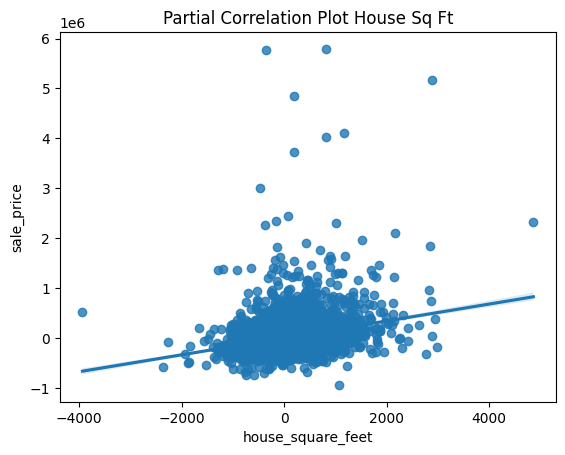

In [39]:
# partial correlation plot house_square_feet
sns.regplot(y=r_y, x=r_x).set(title='Partial Correlation Plot House Sq Ft')
plt.show()

In [40]:
# attic_finished_square_feet
y = df['sale_price'] # target variable
x_k = df['attic_finished_square_feet']
afsf_other = ['attic_finished_square_feet', 'sale_price', 'sale_date', 'sale_price_log']
X_other = df.drop(columns=afsf_other)
# 1 regress y against all other variables and save residuals r_y
reg_y = LinearRegression(fit_intercept=False).fit(X_other, y) # Fit the linear model
r_y = y - reg_y.predict(X_other)

# 2 regress variable against all other variables except itself and save residuals r_x
reg_k = LinearRegression(fit_intercept=False).fit(X_other, x_k) # Fit the linear model
r_x = x_k - reg_k.predict(X_other)

# plot residuals r_y against r_x
reg = LinearRegression().fit(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy())
print('Partial R^2 Attic sq ft: ', reg.score(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy()) )

Partial R^2 Attic sq ft:  0.0066485656846799746


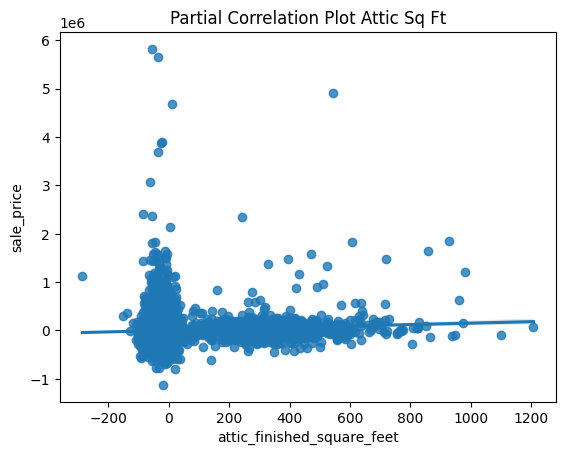

In [41]:
# partial correlation plot attic_finished_square_feet
sns.regplot(y=r_y, x=r_x).set(title='Partial Correlation Plot Attic Sq Ft')
plt.show()

In [42]:
# basement_square_feet
y = df['sale_price'] # target variable
x_k = df['basement_square_feet']
bsf_other = ['basement_square_feet', 'sale_price', 'sale_date', 'sale_price_log']
X_other = df.drop(columns=bsf_other)
# 1 regress y against all other variables and save residuals r_y
reg_y = LinearRegression(fit_intercept=False).fit(X_other, y) # Fit the linear model
r_y = y - reg_y.predict(X_other)

# 2 regress variable against all other variables except itself and save residuals r_x
reg_k = LinearRegression(fit_intercept=False).fit(X_other, x_k) # Fit the linear model
r_x = x_k - reg_k.predict(X_other)

# plot residuals r_y against r_x
reg = LinearRegression().fit(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy())
print('Partial R^2 Basement sq ft: ', reg.score(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy()) )

Partial R^2 Basement sq ft:  0.07544760556068464


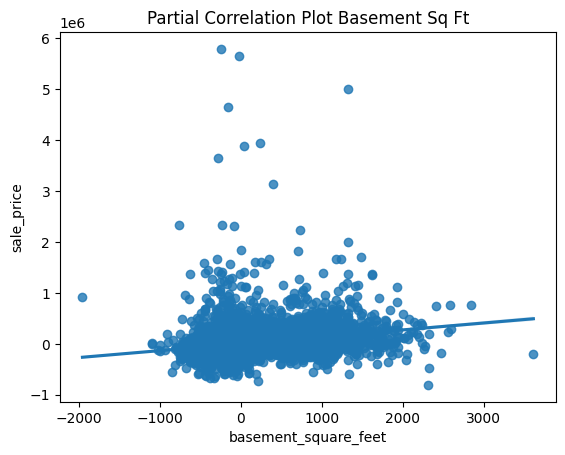

In [43]:
# partial correlation plot basement_square_feet
sns.regplot(y=r_y, x=r_x).set(title='Partial Correlation Plot Basement Sq Ft')
plt.show()

In [44]:
# attached_garage_square_feet
y = df['sale_price'] # target variable
x_k = df['attached_garage_square_feet']
agsf_other = ['attached_garage_square_feet', 'sale_price', 'sale_date', 'sale_price_log']
X_other = df.drop(columns=agsf_other)
# 1 regress y against all other variables and save residuals r_y
reg_y = LinearRegression(fit_intercept=False).fit(X_other, y) # Fit the linear model
r_y = y - reg_y.predict(X_other)

# 2 regress variable against all other variables except itself and save residuals r_x
reg_k = LinearRegression(fit_intercept=False).fit(X_other, x_k) # Fit the linear model
r_x = x_k - reg_k.predict(X_other)

# plot residuals r_y against r_x
reg = LinearRegression().fit(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy())
print('Partial R^2 Attached garage sq ft: ', reg.score(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy()) )

Partial R^2 Attached garage sq ft:  0.01768021500301087


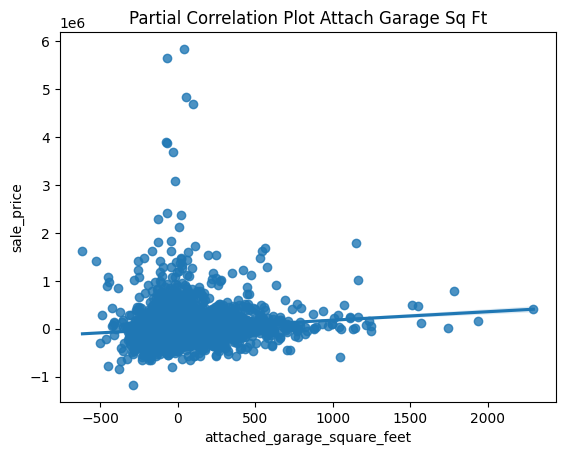

In [45]:
# partial correlation plot attached_garage_square_feet
sns.regplot(y=r_y, x=r_x).set(title='Partial Correlation Plot Attach Garage Sq Ft')
plt.show()

In [49]:
# detached_garage_square_feet
y = df['sale_price'] # target variable
x_k = df['detached_garage_square_feet']
dgsf_other = ['detached_garage_square_feet', 'sale_price', 'sale_date', 'sale_price_log']
X_other = df.drop(columns=dgsf_other)
# 1 regress y against all other variables and save residuals r_y
reg_y = LinearRegression(fit_intercept=False).fit(X_other, y) # Fit the linear model
r_y = y - reg_y.predict(X_other)

# 2 regress variable against all other variables except itself and save residuals r_x
reg_k = LinearRegression(fit_intercept=False).fit(X_other, x_k) # Fit the linear model
r_x = x_k - reg_k.predict(X_other)

# plot residuals r_y against r_x
reg = LinearRegression().fit(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy())
print('Partial R^2 Detached garage sq ft: ', reg.score(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy()) )

Partial R^2 Detached garage sq ft:  0.0015587382464361532


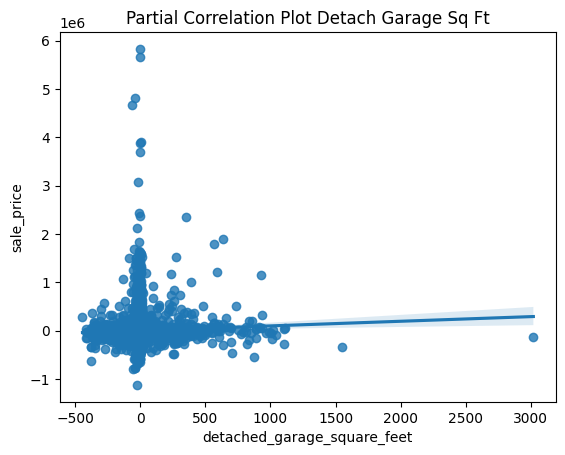

In [50]:
# partial correlation plot detached_garage_square_feet
sns.regplot(y=r_y, x=r_x).set(title='Partial Correlation Plot Detach Garage Sq Ft')
plt.show()

In [51]:
# fireplaces
y = df['sale_price'] # target variable
x_k = df['fireplaces']
fire_other = ['fireplaces', 'sale_price', 'sale_date', 'sale_price_log']
X_other = df.drop(columns=fire_other)
# 1 regress y against all other variables and save residuals r_y
reg_y = LinearRegression(fit_intercept=False).fit(X_other, y) # Fit the linear model
r_y = y - reg_y.predict(X_other)

# 2 regress variable against all other variables except itself and save residuals r_x
reg_k = LinearRegression(fit_intercept=False).fit(X_other, x_k) # Fit the linear model
r_x = x_k - reg_k.predict(X_other)

# plot residuals r_y against r_x
reg = LinearRegression().fit(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy())
print('Partial R^2 Fireplaces: ', reg.score(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy()) )

Partial R^2 Fireplaces:  0.005209341045639748


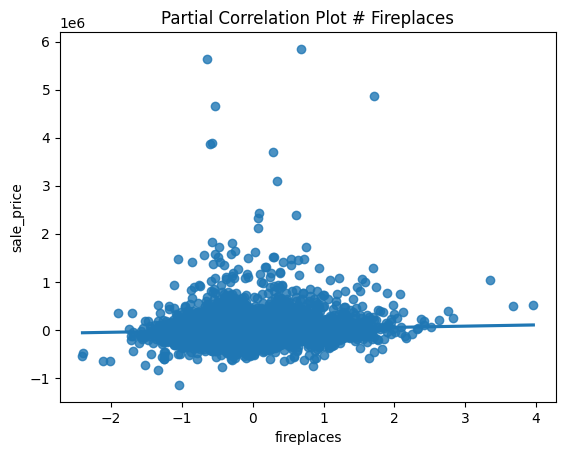

In [52]:
# partial correlation plot fireplaces
sns.regplot(y=r_y, x=r_x).set(title='Partial Correlation Plot # Fireplaces')
plt.show()

In [54]:
# stories
y = df['sale_price'] # target variable
x_k = df['stories']
stories_other = ['stories', 'sale_price', 'sale_date', 'sale_price_log']
X_other = df.drop(columns=stories_other)
# 1 regress y against all other variables and save residuals r_y
reg_y = LinearRegression(fit_intercept=False).fit(X_other, y) # Fit the linear model
r_y = y - reg_y.predict(X_other)

# 2 regress variable against all other variables except itself and save residuals r_x
reg_k = LinearRegression(fit_intercept=False).fit(X_other, x_k) # Fit the linear model
r_x = x_k - reg_k.predict(X_other)

# plot residuals r_y against r_x
reg = LinearRegression().fit(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy())
print('Partial R^2 Stories: ', reg.score(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy()) )

Partial R^2 Stories:  0.008061953435686386


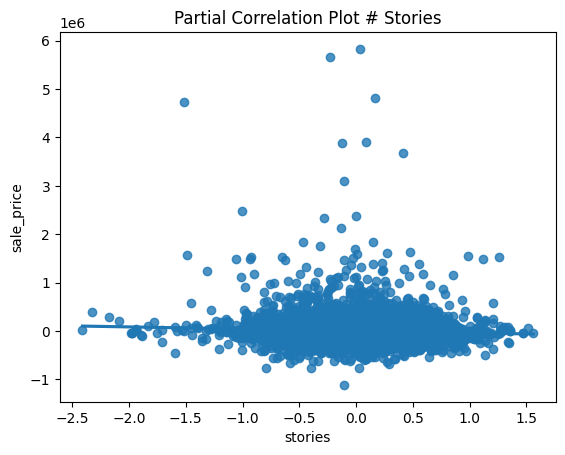

In [55]:
# partial correlation plot stories
sns.regplot(y=r_y, x=r_x).set(title='Partial Correlation Plot # Stories')
plt.show()

In [58]:
# year_built
y = df['sale_price'] # target variable
x_k = df['year_built']
year_other = ['year_built', 'sale_price', 'sale_date', 'sale_price_log']
X_other = df.drop(columns=year_other)
# 1 regress y against all other variables and save residuals r_y
reg_y = LinearRegression(fit_intercept=False).fit(X_other, y) # Fit the linear model
r_y = y - reg_y.predict(X_other)

# 2 regress variable against all other variables except itself and save residuals r_x
reg_k = LinearRegression(fit_intercept=False).fit(X_other, x_k) # Fit the linear model
r_x = x_k - reg_k.predict(X_other)

# plot residuals r_y against r_x
reg = LinearRegression().fit(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy())
print('Partial R^2 Year Built: ', reg.score(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy()) )

Partial R^2 Year Built:  0.02385753772817467


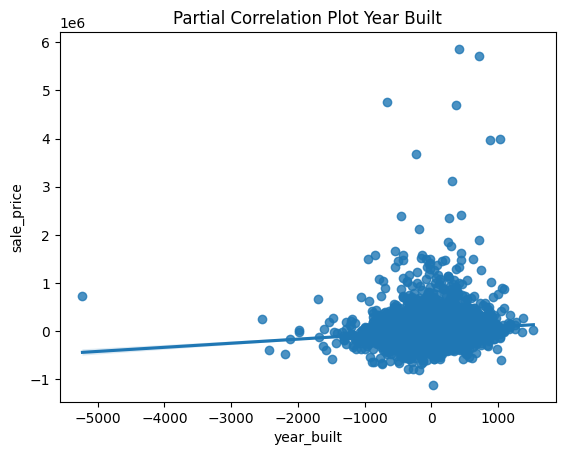

In [59]:
# partial correlation plot year_built
sns.regplot(y=r_y, x=r_x).set(title='Partial Correlation Plot Year Built')
plt.show()

In [61]:
# bedrooms
y = df['sale_price'] # target variable
x_k = df['bedrooms']
bedrooms_other = ['bedrooms', 'sale_price', 'sale_date', 'sale_price_log']
X_other = df.drop(columns=bedrooms_other)
# 1 regress y against all other variables and save residuals r_y
reg_y = LinearRegression(fit_intercept=False).fit(X_other, y) # Fit the linear model
r_y = y - reg_y.predict(X_other)

# 2 regress variable against all other variables except itself and save residuals r_x
reg_k = LinearRegression(fit_intercept=False).fit(X_other, x_k) # Fit the linear model
r_x = x_k - reg_k.predict(X_other)

# plot residuals r_y against r_x
reg = LinearRegression().fit(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy())
print('Partial R^2 Bedrooms: ', reg.score(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy()) )

Partial R^2 Bedrooms:  0.03169205475150849


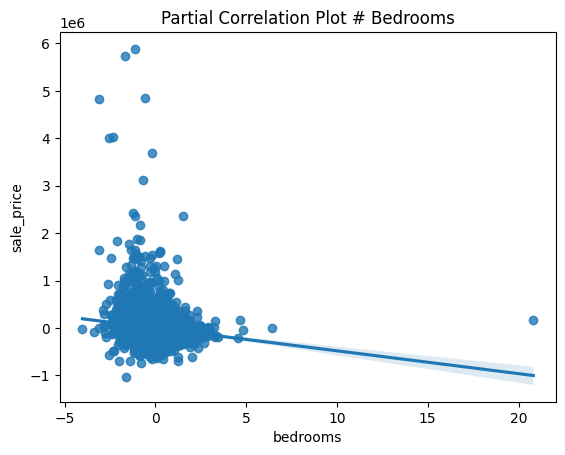

In [62]:
# partial correlation plot bedrooms
sns.regplot(y=r_y, x=r_x).set(title='Partial Correlation Plot # Bedrooms')
plt.show()

In [65]:
# bathrooms
y = df['sale_price'] # target variable
x_k = df['bathrooms']
bathrooms_other = ['bathrooms', 'sale_price', 'sale_date', 'sale_price_log']
X_other = df.drop(columns=bathrooms_other)
# 1 regress y against all other variables and save residuals r_y
reg_y = LinearRegression(fit_intercept=False).fit(X_other, y) # Fit the linear model
r_y = y - reg_y.predict(X_other)

# 2 regress variable against all other variables except itself and save residuals r_x
reg_k = LinearRegression(fit_intercept=False).fit(X_other, x_k) # Fit the linear model
r_x = x_k - reg_k.predict(X_other)

# plot residuals r_y against r_x
reg = LinearRegression().fit(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy())
print('Partial R^2 Bathrooms: ', reg.score(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy()) )

Partial R^2 Bathrooms:  0.0038111289271822724


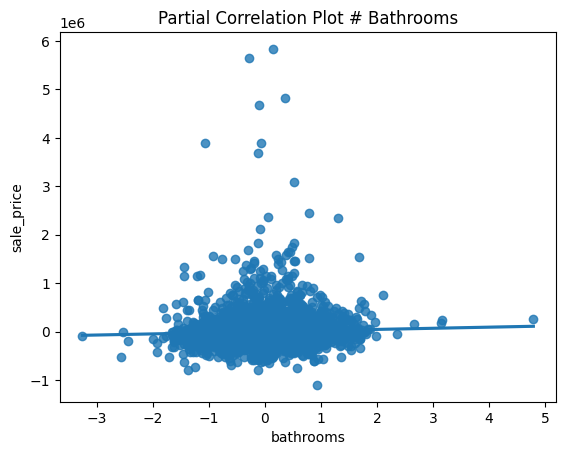

In [64]:
# partial correlation plot bathrooms
sns.regplot(y=r_y, x=r_x).set(title='Partial Correlation Plot # Bathrooms')
plt.show()

**Do you notice any significant non-linearities?**
- House square feet seems like it has a more complex relationship than just linear. It seems to be a positive linear correlation, but possibly with an exponential sort of curve.
- Attic square feet looks as though the relationship should be expressed by a curve in the bottom left of the plot.
- Stories looks like a slightly negative linear correlation so it doesn't really have a relationship with sale price, or at least not one accounted for by linearity
- Year built also looks like it should be expressed by more of an exponential kind of curve increasing to the right of the plot

In [68]:
# Q6
# Include transformations and interactions of your variables, and build a more complex model
# that reflects your ideas about how the features of the asset determine its value
# then determine its RMSE and  𝑅2  on the training and test sets

In [91]:
# target is sale price
y = df['sale_price']
# all features except price, log price, sale date
X = df.drop(columns=['sale_price', 'sale_date', 'sale_price_log'])

In [92]:
X.head()

,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,stories,year_built,bedrooms,bathrooms,garage_Detached,garage_None
0,2157,0,0,528,0,0,2,1993,3,3,0.0,0.0
1,2238,0,0,396,0,0,2,2017,4,3,0.0,0.0
2,1452,0,0,0,0,1,1,1965,3,2,0.0,1.0
3,832,0,0,0,0,0,1,1919,2,1,0.0,1.0
4,1780,0,384,484,0,1,1,1955,3,2,0.0,0.0


In [93]:
# perform transformations based on insights from partial correlation plots

# apply quadratic to house sq ft bc of apparent curve
X['house_square_feet_sq'] = X['house_square_feet']**2
# apply quadratic to year built
X['year_built_sq'] = X['year_built']**2
# quadratic to bedrooms
X['bedrooms_sq'] = X['bedrooms']**2
# quadratic to bathrooms
X['bathrooms_sq'] = X['bathrooms']**2

# some feature interactions to explore

# house square feet x basement square feet, since both have high correlation
X['house_basement'] = X['house_square_feet'] * X['basement_square_feet']
# year built and house square feet, see how age influences size variation
X['year_house'] = X['year_built'] * X['house_square_feet']

In [96]:
X.head()

,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,stories,year_built,bedrooms,bathrooms,garage_Detached,garage_None,house_square_feet_sq,year_built_sq,bedrooms_sq,bathrooms_sq,house_basement,year_house
0,2157,0,0,528,0,0,2,1993,3,3,0.0,0.0,4652649,3972049,9,9,0,4298901
1,2238,0,0,396,0,0,2,2017,4,3,0.0,0.0,5008644,4068289,16,9,0,4514046
2,1452,0,0,0,0,1,1,1965,3,2,0.0,1.0,2108304,3861225,9,4,0,2853180
3,832,0,0,0,0,0,1,1919,2,1,0.0,1.0,692224,3682561,4,1,0,1596608
4,1780,0,384,484,0,1,1,1955,3,2,0.0,0.0,3168400,3822025,9,4,683520,3479900


In [97]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
complex_model = LinearRegression()
complex_model.fit(X_train, y_train)
y_train_pred = complex_model.predict(X_train)
y_test_pred = complex_model.predict(X_test)

In [100]:
# determine rmse and r2 on train and test
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Complex Model - RMSE Train: {rmse_train}, RMSE Test: {rmse_test}")

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"Complex Model - R2 Train: {r2_train}, R2 Test: {r2_test}")

Complex Model - RMSE Train: 173569.62870815262, RMSE Test: 200898.33514782746
Complex Model - R2 Train: 0.43330698166530834, R2 Test: 0.3885219346777473


**How does the more complex model your build compare to the simpler ones?**

Simple model values:



*   RMSE Train: 175,795 | RMSE Test: 202,255
*   R2 Train: 0.418 | R2 Test: 0.380



Complex model values:


*   RMSE Train: 173,569 | RMSE Test: 200,898
*   R2 Train: 0.433 | R2 Test: 0.388

The more complex model performed slightly better than the simpler model. Both RMSE values decreased to show better fit for slightly more accurate predictions. Both R2 values increased, so it is able to explain more variance in house prices than the simple model. The gap between train and test performance grew slightly, but not to the point of overfitting intensely.



**Q7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?**